#### Check Data

In [1]:
import pandas as pd
import numpy as np
import copy
import math
from collections import defaultdict
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import os, sys, pickle, json, time, math, glob, importlib
import copy as cp
import scipy
from tqdm.auto import tqdm
from sklearn.preprocessing import OneHotEncoder

def to_dt(x):
    return pd.to_datetime(x,format="%m/%d/%Y %H.%M.%S %p", errors='coerce')

import shap

import csv
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from IPython.display import display, Math, Latex
import sklearn
import sklearn.datasets

from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
sns.set(style='white', context='notebook', palette='deep')
from sklearn.metrics import roc_curve

In [2]:
df=pd.read_csv("sstartup data (2).csv",parse_dates=['first_funding_at','last_funding_at', 'founded_at', 'closed_at'])

df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                923 non-null    int64         
 1   state_code                923 non-null    object        
 2   latitude                  923 non-null    float64       
 3   longitude                 923 non-null    float64       
 4   zip_code                  923 non-null    object        
 5   id                        923 non-null    object        
 6   city                      923 non-null    object        
 7   Unnamed: 6                430 non-null    object        
 8   name                      923 non-null    object        
 9   labels                    923 non-null    int64         
 10  founded_at                923 non-null    datetime64[ns]
 11  closed_at                 335 non-null    datetime64[ns]
 12  first_funding_at      

In [4]:
df.shape

(923, 49)

## Data Cleansing

In [5]:
#can check for duplicates later.

In [6]:
#Drop unneccesary columns 
df.drop(["Unnamed: 0","Unnamed: 6","id","state_code.1","latitude","longitude","zip_code","city","name",
       "closed_at","founded_at","first_funding_at","last_funding_at","object_id"], axis=1, inplace=True)

df.head()

,state_code,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,...,0,1,1,0,0,0,0,1.0000,1,closed


In [7]:
df.isna().sum() #check for missing values
#There is no missing sum

state_code                    0
labels                        0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roun

## Feature Engineering

In [8]:
# we must get the absolute value of columns including negative value

df["age_first_funding_year"]=np.abs(df["age_first_funding_year"])
df["age_last_funding_year"]=np.abs(df["age_last_funding_year"])
df["age_first_milestone_year"]=np.abs(df["age_first_milestone_year"])
df["age_last_milestone_year"]=np.abs(df["age_last_milestone_year"])


In [9]:
#fill the Nan Values with their median 
df.age_first_milestone_year.fillna(df["age_first_milestone_year"].median(), inplace=True)
df.age_last_milestone_year.fillna(df["age_last_milestone_year"].median(), inplace=True)
#df.closed_at.fillna(df["closed_at"].median(), inplace=True)
#df.age.fillna(df["age"].median(), inplace=True)

In [10]:
#df["age"]

In [11]:
print(df.columns.tolist())

['state_code', 'labels', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status']


#### Data Visualization

How many Startup are acquired in the dataset?

In [12]:
df[(df["labels"] == 0)].shape

(326, 35)

How many Startup are closed in the dataset?

In [13]:
df[(df["labels"] == 1)].shape

(597, 35)

In [14]:
df["category_code"].unique()

array(['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate',
       'health'], dtype=object)

In [15]:
len(df["category_code"].unique())

35

In [16]:
df["state_code"].unique()

array(['CA', 'MA', 'KY', 'NY', 'CO', 'VA', 'TX', 'WA', 'IL', 'NC', 'PA',
       'GA', 'NH', 'MO', 'FL', 'NJ', 'WV', 'MI', 'DC', 'CT', 'MD', 'OH',
       'TN', 'MN', 'RI', 'OR', 'UT', 'ME', 'NV', 'NM', 'IN', 'AZ', 'ID',
       'AR', 'WI'], dtype=object)

In [17]:
len(df["state_code"].unique())

35

Find Industry with the most startups?

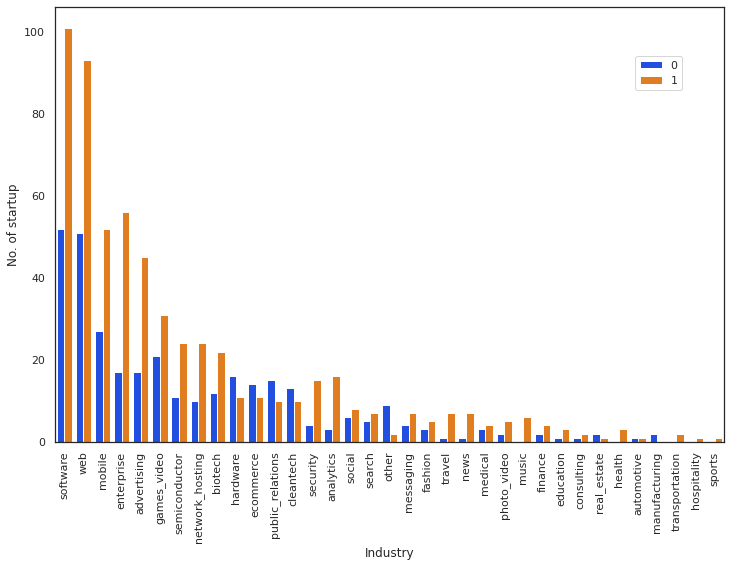

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="category_code", hue="labels", data=df, palette="bright",
              order=df.category_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Industry", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))
plt.savefig("Find Industry with the most startups.png")

Find state with the most startups?

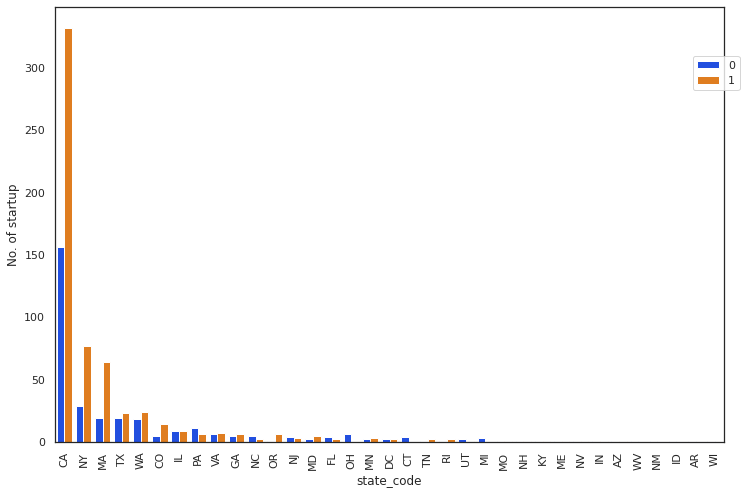

In [19]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="state_code", hue="labels", data=df, palette="bright",
              order=df.state_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

Which category having most number of total funding

In [20]:
funding_sorted_category = pd.pivot_table(df,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_category.head(10)

,category_code,funding_total_usd
18,mobile,7263750881
30,software,2657598865
34,web,1729035436
3,biotech,1723699484
8,enterprise,1338882096
4,cleantech,1300284730
28,semiconductor,1105156970
0,advertising,918619012
11,games_video,844643530
12,hardware,773938873


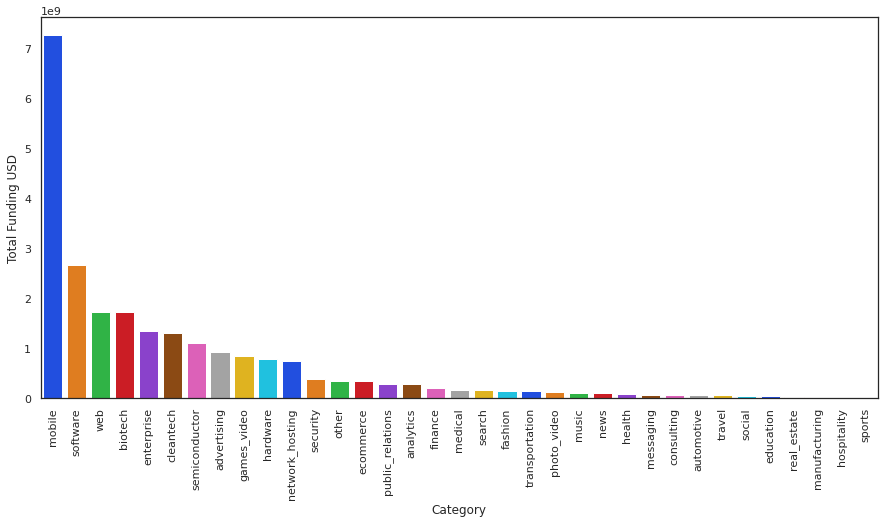

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot(x="category_code", y="funding_total_usd", data=funding_sorted_category,
                palette="bright", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Total Funding USD")

which funding_rounds related to acquired or closed startup?

<AxesSubplot:xlabel='funding_rounds', ylabel='count'>

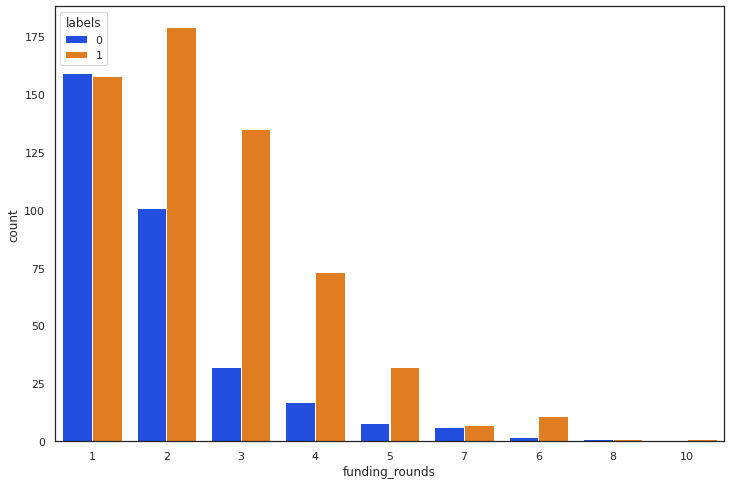

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="labels", data=df, palette="bright",
              order=df.funding_rounds.value_counts().index)
# plt.legend(bbox_to_anchor=(0.945, 0.90))

<AxesSubplot:xlabel='age_first_funding_year', ylabel='age_first_milestone_year'>

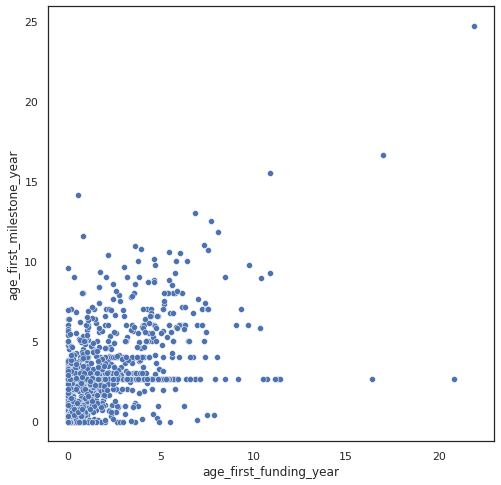

In [23]:
plt.figure(figsize=(8,8))
sns.scatterplot(df["age_first_funding_year"], df["age_first_milestone_year"])




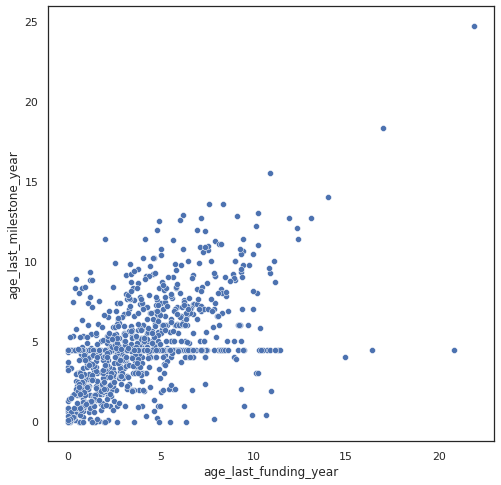

In [24]:
plt.figure(figsize=(8,8))
sns.scatterplot(df["age_last_funding_year"], df["age_last_milestone_year"]);

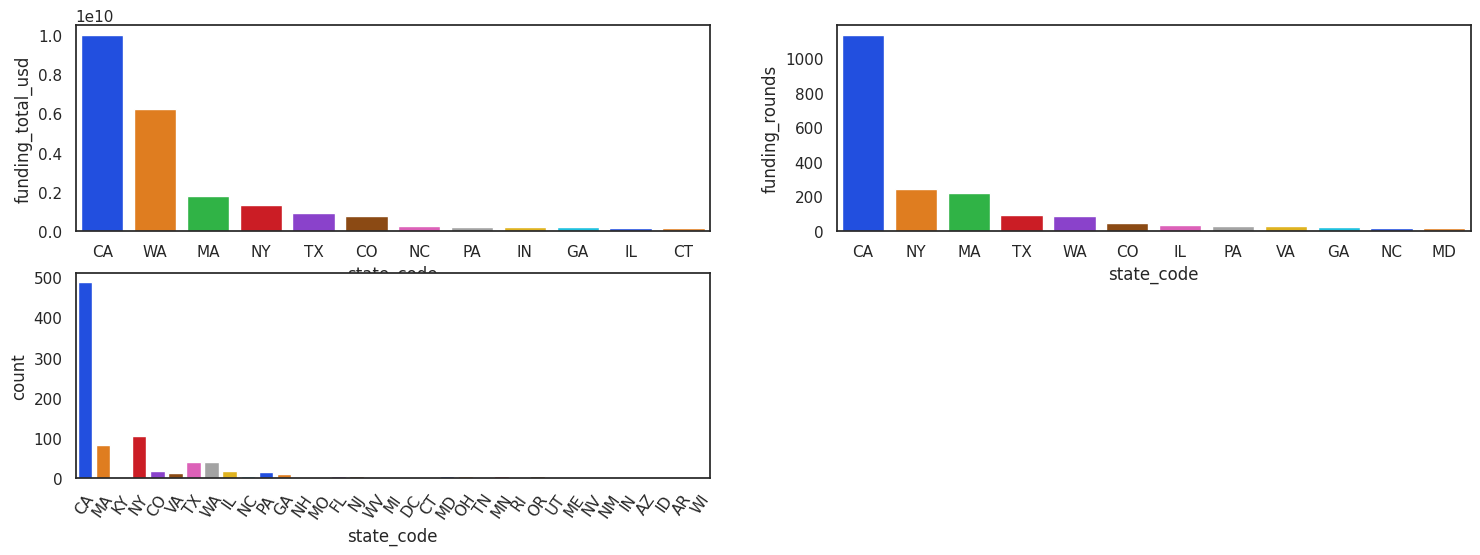

In [25]:
df_state=df.groupby(["state_code"])["funding_total_usd"].sum().sort_values(ascending=False).reset_index().head(12)

plt.figure(figsize=(18,6), dpi=100)
plt.subplot(2,2,1)
plt.ylabel("First 10 state")
plt.xlabel("Total USD of Funding")
sns.barplot(df_state["state_code"],df_state["funding_total_usd"], palette="bright")


plt.subplot(2,2,2)
df_funding=df.groupby(["state_code"])["funding_rounds"].sum().sort_values(ascending=False).reset_index().head(12)
sns.barplot(df_funding["state_code"], df_funding["funding_rounds"], palette="bright")

plt.subplot(2,2,3)
sns.countplot(df["state_code"],  palette="bright")
plt.xticks(rotation=55);

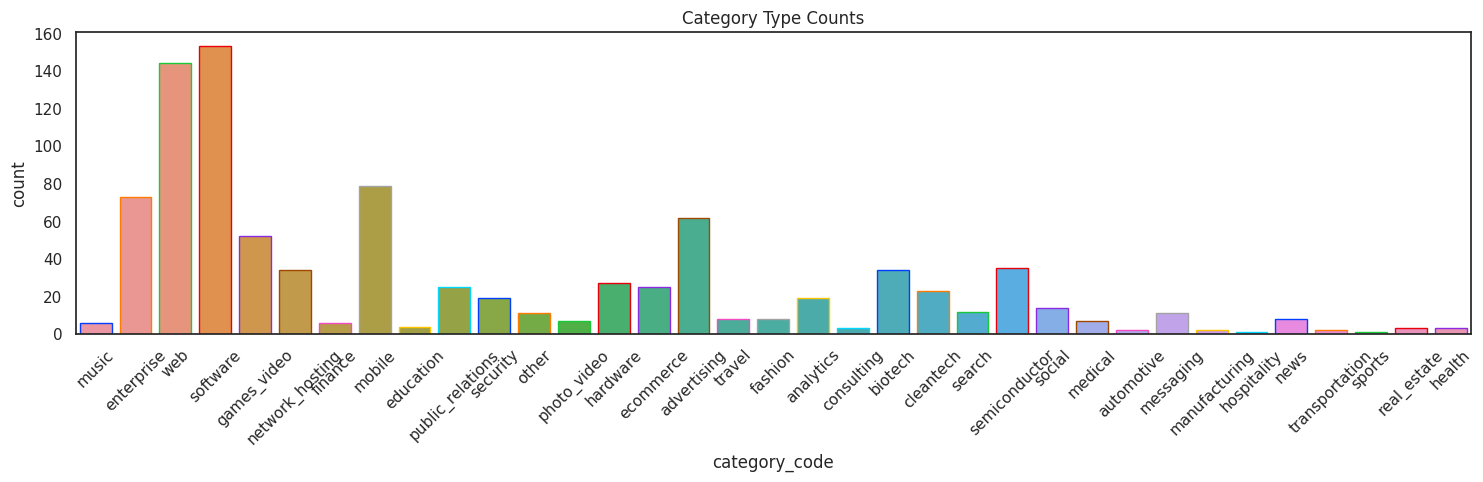

In [26]:
plt.figure(figsize=(18,4),dpi=100)
plt.xticks(rotation=45)
plt.title("Category Type Counts")
sns.countplot(df["category_code"], edgecolor=sns.color_palette( palette="bright"));

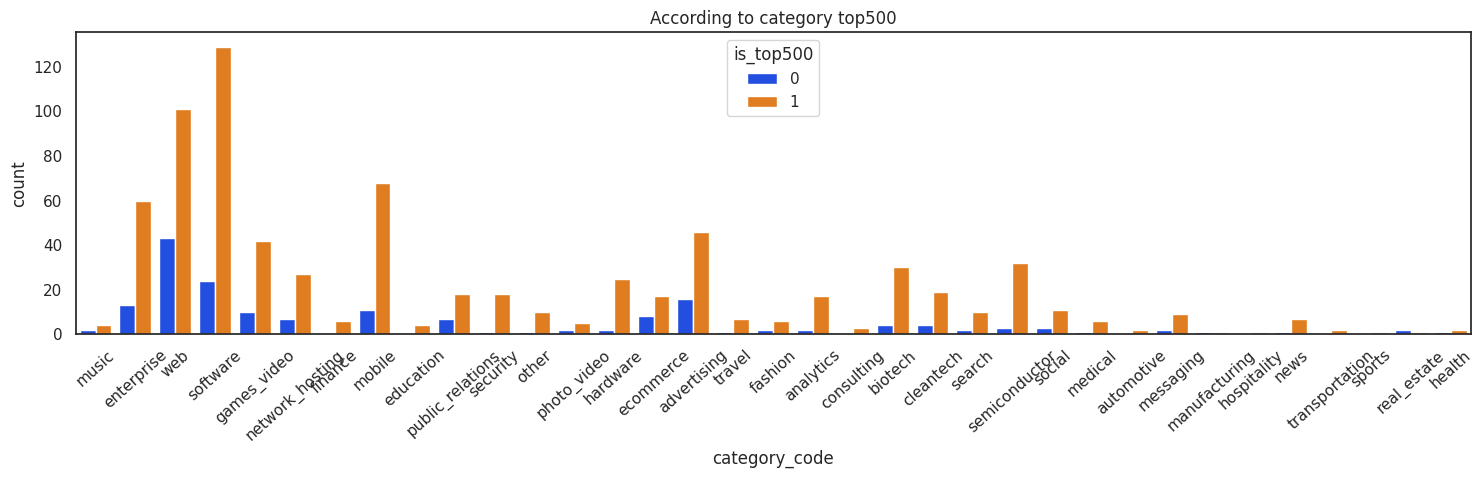

In [27]:
plt.figure(figsize=(18,4),dpi=100)

plt.xticks(rotation=42)
plt.title("According to category top500")
sns.countplot(x=df["category_code"], hue=df["is_top500"], palette="bright");

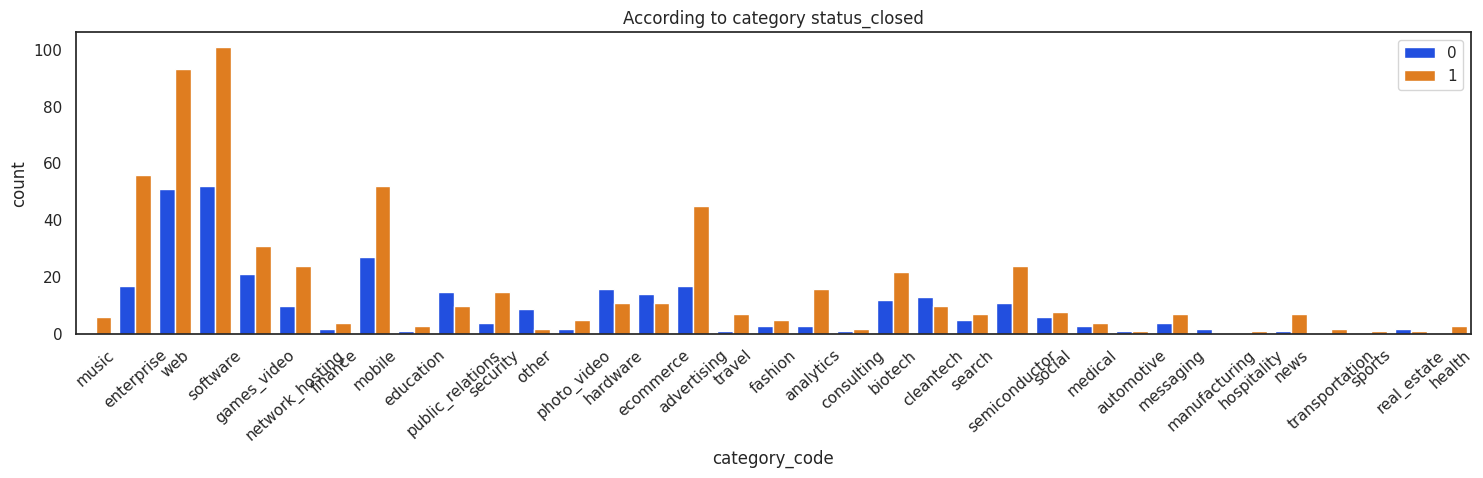

In [28]:
plt.figure(figsize=(18,4),dpi=100)

plt.xticks(rotation=42)
plt.title("According to category status_closed")
sns.countplot(x=df["category_code"], hue=df["labels"],  palette="bright")
plt.legend(loc=1);

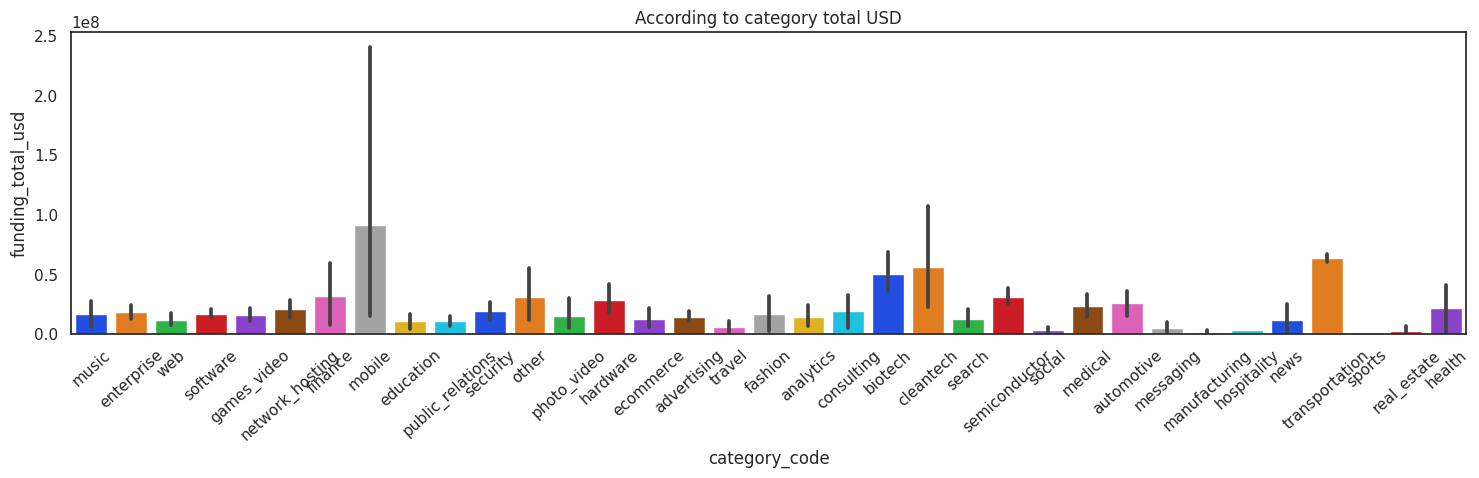

In [29]:
plt.figure(figsize=(18,4),dpi=100)

plt.xticks(rotation=42)
plt.title("According to category total USD")
sns.barplot(x=df["category_code"], y=df["funding_total_usd"],  palette="bright");

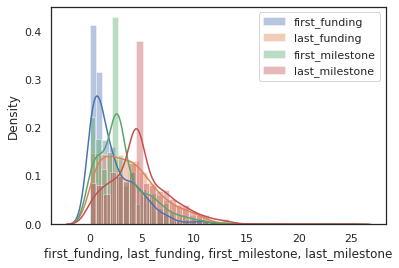

In [30]:

sns.distplot(df["age_first_funding_year"], label="first_funding")
sns.distplot(df["age_last_funding_year"], label="last_funding")
sns.distplot(df["age_first_milestone_year"], label="first_milestone")
sns.distplot(df["age_last_milestone_year"], label="last_milestone")
plt.xlabel("first_funding, last_funding, first_milestone, last_milestone")
plt.legend()


plt.show()

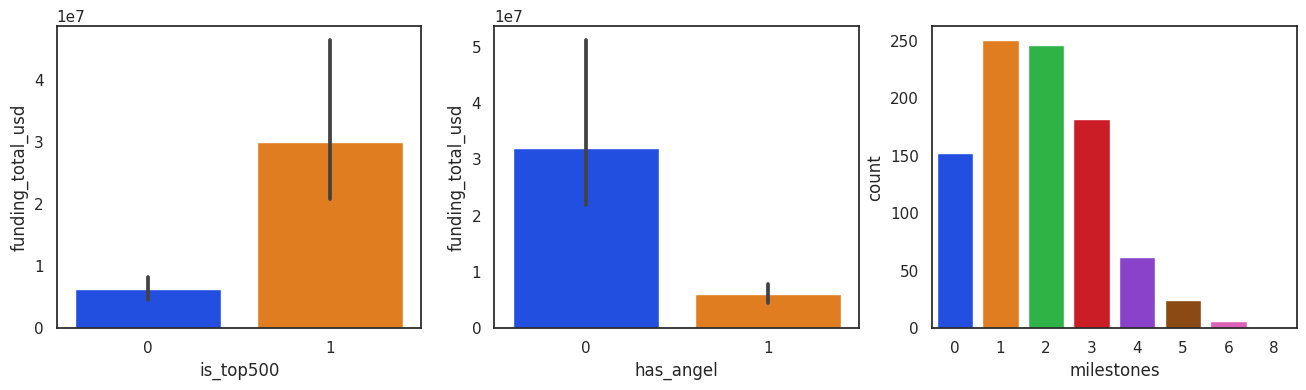

In [31]:
plt.figure(figsize=(16,4),dpi=100)

plt.subplot(1,3,1)
sns.barplot(df["is_top500"], df["funding_total_usd"],  palette="bright")

plt.subplot(1,3,2)
sns.barplot(df["has_angel"], df["funding_total_usd"],  palette="bright")

plt.subplot(1,3,3)
sns.countplot(df.milestones, palette="bright");

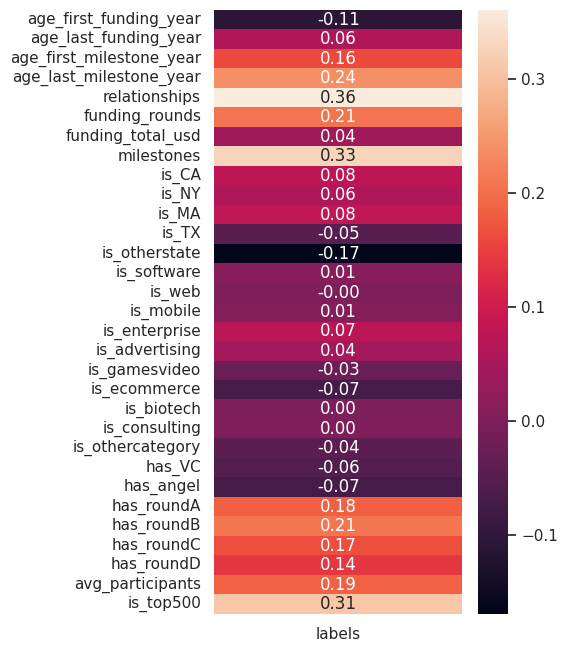

In [32]:
# The most relational columns with target variable(status_closed) are below:

plt.figure(figsize=(4,8),dpi=100)

focus_cols = ['labels']
df_corr=df.corr().filter(focus_cols).drop(focus_cols)
sns.heatmap(df_corr, annot=True, fmt='.2f');

X=X.drop(["founded_at", "closed_at"], axis=1)

In [33]:
#X.info()

In [34]:
#X['age'].isnull().values.any()

In [35]:
#mean_value=X['age'].mean()
#X['age'].fillna(value=mean_value, inplace=True)

#### Data Preprocessing

In [36]:
X=df.drop(["status", "state_code","category_code"], axis=1)
Y=df.labels

In [37]:
X

,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,...,0,1,0,1,0,0,0,0,1.0000,0
1,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,...,0,0,1,0,0,1,1,1,4.7500,1
2,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,...,0,0,0,0,1,0,0,0,4.0000,1
3,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,...,0,0,0,0,0,1,1,1,3.3333,1
4,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,...,0,0,1,1,0,0,0,0,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,1,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,...,0,0,0,0,1,0,0,0,6.0000,1
919,0,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,...,0,1,1,0,0,1,0,0,2.6667,1
920,0,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,...,0,0,0,0,0,0,0,1,8.0000,1
921,1,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,...,0,0,0,0,1,1,0,0,1.0000,1


df



pca=PCA(n_components=32)

X_pca=pca.fit_transform(X)

import matplotlib.pyplot as plt
pca = PCA()
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [38]:
X=StandardScaler().fit_transform(X)
pca_new=PCA(n_components=17)
X_new=pca_new.fit_transform(X)
# I have chosen first 17 features in this dataset

import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [39]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix


# With X_new variable, continue to apply machine learning algorithm
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.30, random_state=42)



from sklearn.metrics import accuracy_score,classification_report, confusion_matrix


# With X_new variable, continue to apply machine learning algorithm
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.30, random_state=42)




#### CLassification Modelling

In [40]:
from sklearn.model_selection import GridSearchCV  
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
model = SGDClassifier(loss='hinge',class_weight='balanced')
model.fit(X_train, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class, not the predicted outputs.

y_pred_svclinear_train= model.decision_function(X_train)    
y_pred_svclinear_test = model.decision_function(X_test) 
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_pred_svclinear_train)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_pred_svclinear_test)



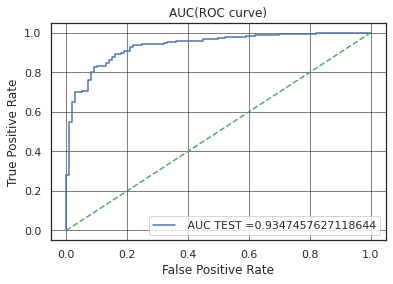

In [41]:
plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

#### SVM_Rbf

The accuracy of the rbf_Support Vector Machines on test data is 0.899
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       100
           1       0.92      0.93      0.92       177

    accuracy                           0.90       277
   macro avg       0.89      0.89      0.89       277
weighted avg       0.90      0.90      0.90       277

The accuracy of the rbf_Support Vector Machines on training data is 0.926
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       226
           1       0.93      0.96      0.94       420

    accuracy                           0.93       646
   macro avg       0.92      0.91      0.92       646
weighted avg       0.93      0.93      0.93       646

[[ 85  15]
 [ 13 164]]


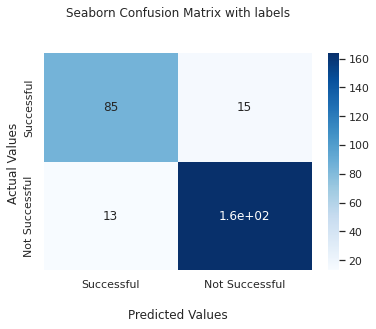

<Figure size 1008x360 with 0 Axes>

In [42]:
rbf_svm = SVC(kernel='rbf')

y_pred_rbf_svm_test = rbf_svm.fit(X_train, Y_train).predict(X_test)
print('The accuracy of the rbf_Support Vector Machines on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred_rbf_svm_test,Y_test)))

print(metrics.classification_report(Y_test, y_pred_rbf_svm_test))


#i noticed that the accuracy from the metrics accuracy score and the clasification report are approximately equal.
#### Compute and Plot the confusion matrix

y_pred_rbf_svm_train = rbf_svm.fit(X_train, Y_train).predict(X_train)
print('The accuracy of the rbf_Support Vector Machines on training data is',"{:.3f}".format(metrics.accuracy_score(y_pred_rbf_svm_train,Y_train)))

print(metrics.classification_report(Y_train, y_pred_rbf_svm_train))

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test, y_pred_rbf_svm_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Successful","Not Successful"])
ax.yaxis.set_ticklabels(["Successful","Not Successful"])

## Display the visualization of the Confusion Matrix.
plt.figure(figsize=(14, 5))
plt.show()

#### knn Classifier

The accuracy of the KNN Classifier on test data is 0.816
              precision    recall  f1-score   support

           0       0.81      0.64      0.72       100
           1       0.82      0.92      0.86       177

    accuracy                           0.82       277
   macro avg       0.81      0.78      0.79       277
weighted avg       0.82      0.82      0.81       277

The accuracy of the KNN Classifier on train data is 0.853
              precision    recall  f1-score   support

           0       0.86      0.69      0.77       226
           1       0.85      0.94      0.89       420

    accuracy                           0.85       646
   macro avg       0.86      0.82      0.83       646
weighted avg       0.85      0.85      0.85       646

[[ 64  36]
 [ 15 162]]


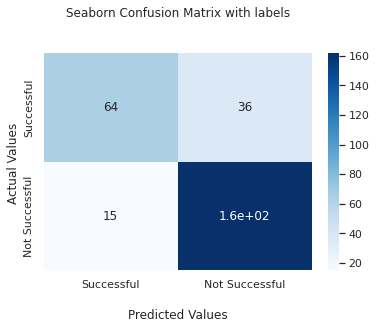

<Figure size 1008x360 with 0 Axes>

In [43]:
#Set a knn Classifier
knn_model=KNeighborsClassifier(n_neighbors= 5) 
knn_model.fit(X_train,Y_train) #Fit the model using the dataset
y_knn_model_pred_test=knn_model.predict(X_test) #Predict using testing data
print('The accuracy of the KNN Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_knn_model_pred_test,Y_test)))
#from sklearn import tree
#tree.plot_tree(prediction)
#import metrics for evaluation

print(metrics.classification_report(Y_test, y_knn_model_pred_test)) 

#i noticed that the accuracy from the metrics accuracy score and the clasification report are approximately equal.

y_knn_model_pred_train=knn_model.predict(X_train) #Predict using testing data
print('The accuracy of the KNN Classifier on train data is',"{:.3f}".format(metrics.accuracy_score(y_knn_model_pred_train,Y_train)))
#from sklearn import tree
#tree.plot_tree(prediction)
#import metrics for evaluation

print(metrics.classification_report(Y_train, y_knn_model_pred_train))

#i noticed that the accuracy from the metrics accuracy score and the clasification report are approximately equal.


from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test, y_knn_model_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Successful","Not Successful"])
ax.yaxis.set_ticklabels(["Successful","Not Successful"])

## Display the visualization of the Confusion Matrix.
plt.figure(figsize=(14, 5))
plt.show()

#### (iv) Naive Bayes

The accuracy of the Guassian Naive Bayes Classifier on test data is 0.827
              precision    recall  f1-score   support

           0       0.80      0.70      0.74       100
           1       0.84      0.90      0.87       177

    accuracy                           0.83       277
   macro avg       0.82      0.80      0.81       277
weighted avg       0.82      0.83      0.82       277

The accuracy of the Guassian Naive Bayes Classifier on train data is 0.837
              precision    recall  f1-score   support

           0       0.82      0.68      0.75       226
           1       0.84      0.92      0.88       420

    accuracy                           0.84       646
   macro avg       0.83      0.80      0.81       646
weighted avg       0.84      0.84      0.83       646

[[ 70  30]
 [ 18 159]]


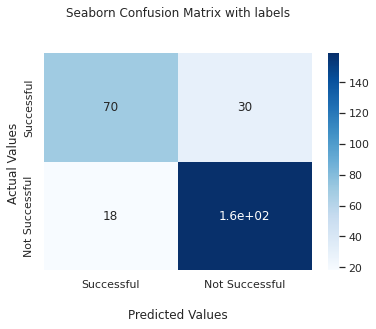

<Figure size 1008x360 with 0 Axes>

In [44]:
# Guassian Naive Bayes Classifier
nb_model2 = GaussianNB()
y_pred_nb_test = nb_model2.fit(X_train, Y_train).predict(X_test)#Fit the model using the dataset,#Predict using testing data
print('The accuracy of the Guassian Naive Bayes Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred_nb_test,Y_test)))
print(metrics.classification_report(Y_test, y_pred_nb_test))

y_pred_nb_train = nb_model2.fit(X_train, Y_train).predict(X_train)#Fit the model using the dataset,#Predict using testing data
print('The accuracy of the Guassian Naive Bayes Classifier on train data is',"{:.3f}".format(metrics.accuracy_score(y_pred_nb_train,Y_train)))
print(metrics.classification_report(Y_train, y_pred_nb_train))


from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test, y_pred_nb_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Successful","Not Successful"])
ax.yaxis.set_ticklabels(["Successful","Not Successful"])

## Display the visualization of the Confusion Matrix.
plt.figure(figsize=(14, 5))
plt.show()

#### Logistic Regression

The accuracy of the LogisticRegression on test data is 0.895
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       100
           1       0.93      0.90      0.92       177

    accuracy                           0.90       277
   macro avg       0.88      0.89      0.89       277
weighted avg       0.90      0.90      0.90       277

The accuracy of the LogisticRegression on tRAIN data is 0.868
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       226
           1       0.89      0.91      0.90       420

    accuracy                           0.87       646
   macro avg       0.86      0.85      0.85       646
weighted avg       0.87      0.87      0.87       646

[[ 88  12]
 [ 17 160]]


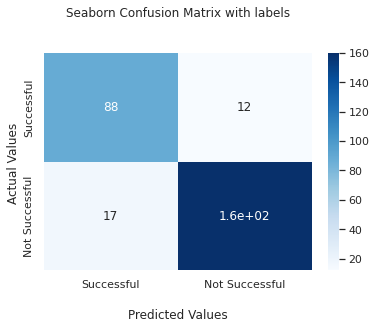

<Figure size 1008x360 with 0 Axes>

In [45]:

lr_model3 = LogisticRegression()
y_pred_lr_test= lr_model3.fit(X_train, Y_train).predict(X_test)
print('The accuracy of the LogisticRegression on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred_lr_test,Y_test)))
print(metrics.classification_report(Y_test, y_pred_lr_test))

y_pred_lr_train= lr_model3.fit(X_train, Y_train).predict(X_train)
print('The accuracy of the LogisticRegression on tRAIN data is',"{:.3f}".format(metrics.accuracy_score(y_pred_lr_train,Y_train)))
print(metrics.classification_report(Y_train, y_pred_lr_train))


from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test, y_pred_lr_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Successful","Not Successful"])
ax.yaxis.set_ticklabels(["Successful","Not Successful"])

## Display the visualization of the Confusion Matrix.
plt.figure(figsize=(14, 5))
plt.show()

#### (v) Decision Trees

The accuracy of the DecisionTreeClassifier on test data is 0.726
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       100
           1       0.80      0.76      0.78       177

    accuracy                           0.73       277
   macro avg       0.70      0.71      0.71       277
weighted avg       0.73      0.73      0.73       277

The accuracy of the DecisionTreeClassifier on tRAIN data is 0.868
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       226
           1       0.89      0.91      0.90       420

    accuracy                           0.87       646
   macro avg       0.86      0.85      0.85       646
weighted avg       0.87      0.87      0.87       646

[[ 66  34]
 [ 42 135]]


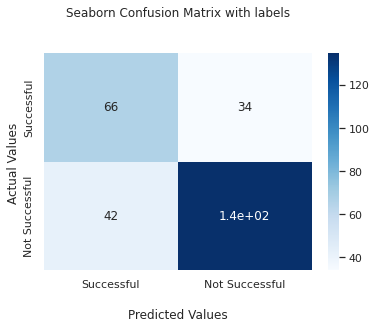

<Figure size 1008x360 with 0 Axes>

In [46]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
dt.fit(X_train, Y_train)
y_pred_dt_test = dt.predict(X_test)

print('The accuracy of the DecisionTreeClassifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred_dt_test,Y_test)))
print(metrics.classification_report(Y_test, y_pred_dt_test))

y_pred_dt_train= lr_model3.fit(X_train, Y_train).predict(X_train)
print('The accuracy of the DecisionTreeClassifier on tRAIN data is',"{:.3f}".format(metrics.accuracy_score(y_pred_dt_train,Y_train)))
print(metrics.classification_report(Y_train, y_pred_dt_train))


from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test, y_pred_dt_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Successful","Not Successful"])
ax.yaxis.set_ticklabels(["Successful","Not Successful"])

## Display the visualization of the Confusion Matrix.
plt.figure(figsize=(14, 5))
plt.show()

#### (vi) Random Forests

The accuracy of the Random Forests on test data is 0.812
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       100
           1       0.82      0.90      0.86       177

    accuracy                           0.81       277
   macro avg       0.81      0.78      0.79       277
weighted avg       0.81      0.81      0.81       277

The accuracy of the Random Forests on train data is 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       420

    accuracy                           1.00       646
   macro avg       1.00      1.00      1.00       646
weighted avg       1.00      1.00      1.00       646

[[ 65  35]
 [ 17 160]]


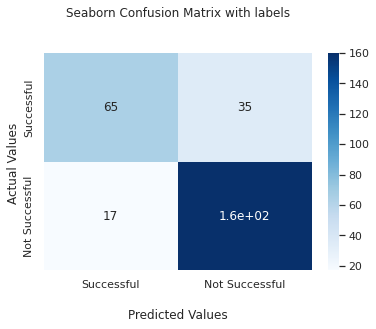

<Figure size 1008x360 with 0 Axes>

In [47]:
classifier=RandomForestClassifier(n_estimators=300,random_state=0)
y_pred_RF_test= classifier.fit(X_train,Y_train).predict(X_test)
print('The accuracy of the Random Forests on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred_RF_test,Y_test)))
print(metrics.classification_report(Y_test, y_pred_RF_test))

y_pred_RF_train= classifier.fit(X_train,Y_train).predict(X_train)
print('The accuracy of the Random Forests on train data is',"{:.3f}".format(metrics.accuracy_score(y_pred_RF_train,Y_train)))
print(metrics.classification_report(Y_train, y_pred_RF_train))


from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test, y_pred_RF_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Successful","Not Successful"])
ax.yaxis.set_ticklabels(["Successful","Not Successful"])

## Display the visualization of the Confusion Matrix.
plt.figure(figsize=(14, 5))
plt.show()

In [48]:
log=accuracy_score(Y_test,y_pred_lr_test)
print("log:",log)
forest=accuracy_score(Y_test,y_pred_RF_test)
print("forest",forest)
knn=accuracy_score(Y_test,y_knn_model_pred_test)
print("knn",knn)
linear_svc=accuracy_score(Y_test,y_pred_svclinear_test)
print("linear_svc", linear_svc)
rbf_svc=accuracy_score(Y_test, y_pred_rbf_svm_test)
print("rbf_svc",rbf_svc)
DT=accuracy_score(Y_test,y_pred_dt_test)
print("DT", DT)
NB=accuracy_score(Y_test,y_pred_nb_test)
print("NB", NB)
#xgboost=accuracy_score(Y_test,y_test_pred_xgboost)

log_df=pd.Series(log)
forest_df=pd.Series(forest)
knn_df=pd.Series(knn)
linear_svc_df=pd.Series(linear_svc)
rbf_svc_df=pd.Series(rbf_svc)
DT_df=pd.Series(DT)
NB_df=pd.Series(NB)
#knn_df=pd.Series(knn)
#svc_df=pd.Series(svc)
#xgboost_df=pd.Series(xgboost)

sns.set(style = "darkgrid" , font_scale = 1.2)
plt.bar("Log_reg", height=log_df)
plt.bar("RF", height=forest_df)
plt.bar("KNN", height=knn_df)
plt.bar("linear_svc", height=linear_svc_df)
plt.bar("rbf_svc", height=rbf_svc_df)
plt.bar("DT", height=DT_df)
plt.bar("NB", height=NB_df)
#plt.bar("XGBOOST", height=xgboost_df)
plt.xticks(rotation=45);

log: 0.8953068592057761
forest 0.8122743682310469
knn 0.8158844765342961


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [50]:
r_probs=[0 for i in range(len(Y_test))]
y1_pred_prob=lr_model3.predict_proba(X_test)[::,1]
y2_pred_prob=classifier.predict_proba(X_test)[::,1]
y3_pred_prob=knn_model.predict_proba(X_test)[::,1]
#y5_pred_prob=svm_linear.predict_proba(X_test)[::,1]
#y6_pred_prob=rbf_svm.predict_proba(X_test)[::,1]
y4_pred_prob=dt.predict_proba(X_test)[::,1]
y5_pred_prob=nb_model2.predict_proba(X_test)[::,1]

In [51]:
fpr1, tpr1, _a = metrics.roc_curve(Y_test,  y1_pred_prob)
fpr2,tpr2,_b= metrics.roc_curve(Y_test,  y2_pred_prob)
fpr3, tpr3, _c = metrics.roc_curve(Y_test,  y3_pred_prob)
fpr4,tpr4,_d= metrics.roc_curve(Y_test,  y4_pred_prob)
fpr5, tpr5, _e = metrics.roc_curve(Y_test,  y5_pred_prob)
#fpr4,tpr4,_d= metrics.roc_curve(Y_test,  r_probs)

In [52]:
## Compute the area under the curve
AUC=metrics.auc(fpr1, tpr1)
print("AUC for LR =", AUC)

## Compute the area under the curve
AUC=metrics.auc(fpr2, tpr2)
print("AUC for RF =", AUC)

## Compute the area under the curve
AUC=metrics.auc(fpr3, tpr3)
print("AUC for Nearest Neighbors =", AUC)

## Compute the area under the curve
AUC=metrics.auc(fpr4, tpr4)
print("AUC for DT =", AUC)
## Compute the area under the curve
AUC=metrics.auc(fpr5, tpr5)
print("AUC for Naive Bayes =", AUC)



AUC for LR = 0.9449717514124294
AUC for RF = 0.915141242937853
AUC for Nearest Neighbors = 0.8468644067796611
AUC for DT = 0.7113559322033898
AUC for Naive Bayes = 0.9175141242937853


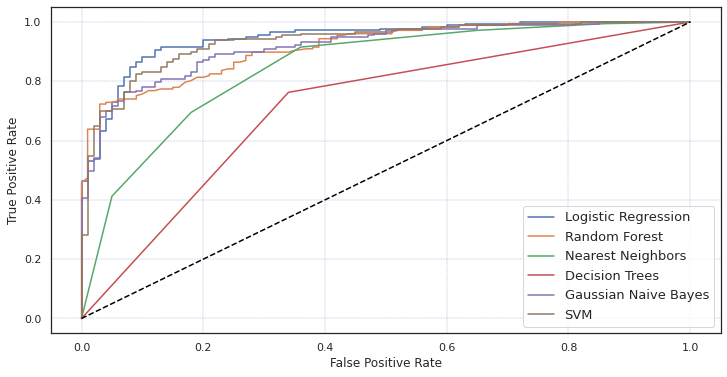

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(fpr1,tpr1,label="Logistic Regression")
plt.plot(fpr2,tpr2,label="Random Forest")
plt.plot(fpr3,tpr3,label="Nearest Neighbors")
plt.plot(fpr4,tpr4,label="Decision Trees")
plt.plot(fpr5,tpr5,label="Gaussian Naive Bayes")
plt.plot(test_fpr, test_tpr, label="SVM")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1],linestyle='--', color='black')
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()


RF TOP Features

Text(0.5, 1.0, 'feature importance score')

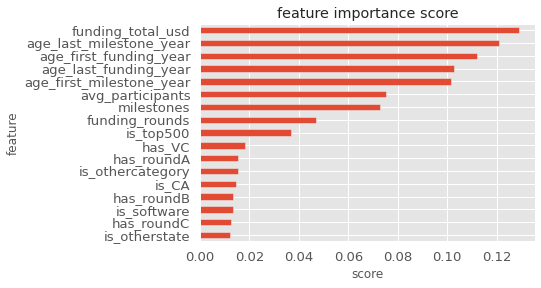

In [67]:
X_FS=df.drop(["status", "state_code","category_code", "labels", "relationships"], axis=1)
Y=df.labels
X_train, X_test, Y_train, Y_test = train_test_split(X_FS, Y, test_size=0.30, random_state=42)
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=300,random_state=0)
classifier.fit(X_train,Y_train).predict(X_test)
feat_importances = pd.Series(classifier.feature_importances_, index=X_FS.columns)
ax = feat_importances.nlargest(17).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

DT TOP Features

Text(0.5, 1.0, 'feature importance score')

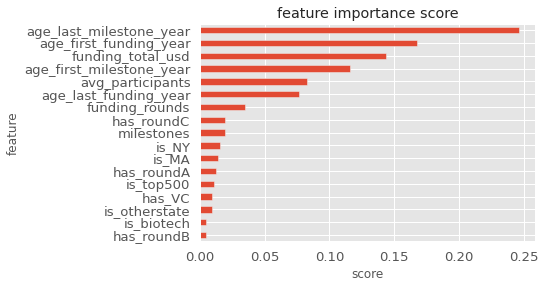

In [64]:
X_FS=df.drop(["status", "state_code","category_code", "labels", "relationships"], axis=1)
Y=df.labels
X_train, X_test, Y_train, Y_test = train_test_split(X_FS, Y, test_size=0.30, random_state=42)
from sklearn.tree import DecisionTreeClassifier, plot_tree
#from sklearn.tree import DecisionTreeRegressor, plot_tree
reg = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
reg.fit(X_train, Y_train)
reg.predict(X_test)
feat_importances = pd.Series(reg.feature_importances_, index=X_FS.columns)
ax = feat_importances.nlargest(17).plot(kind='barh')
ax.invert_yaxis()
plt.figure(figsize=(12,6))
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')